<a href="https://colab.research.google.com/github/Domadrona/Sensores1_DL/blob/master/Proyecto_final_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio de prueba


Using TensorFlow backend.


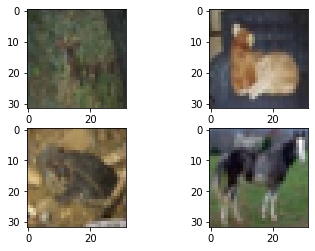

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train), (x_test, y_test) = cifar10.load_data()
plt.subplot(221)
plt.imshow(x_train[10], cmap=plt.get_cmap('gray'))#por que no lo muestra en escala de grices??
plt.subplot(222)
plt.imshow(x_train[17], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[37], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
from time import time
from numpy.random import seed
seed(1)
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils
tiempo_inicial = time()
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print(x_train.shape)#tengo 50000 imagenes de 32X32X3
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
print('el valor dentro de la primera posicion de Y es ()', format(y_train[0,]))
print()
print()
print(x_train[0,:,:])

el valor dentro de la primera posicion de Y es () [6]


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
x_train = x_train.reshape(50000, 32, 32, 3)/255#no entiendo, cambia la forma, como y para que? #intento normalizando/255
x_test = x_test.reshape(10000, 32, 32, 3)/255##cuanto pongo? rgb=3
y_train = np_utils.to_categorical(y_train, 10)#cambia a categoricas la y 2= 00100
y_test = np_utils.to_categorical(y_test, 10)
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [7]:
print('El valor del modelo dentro de x: ')
print(x_train[0,:,:,0])
print()
print('valores dentro de y')
print(y_train[0,:])

El valor del modelo dentro de x: 
[[0.23137255 0.16862745 0.19607843 ... 0.61960784 0.59607843 0.58039216]
 [0.0627451  0.         0.07058824 ... 0.48235294 0.46666667 0.47843137]
 [0.09803922 0.0627451  0.19215686 ... 0.4627451  0.47058824 0.42745098]
 ...
 [0.81568627 0.78823529 0.77647059 ... 0.62745098 0.21960784 0.20784314]
 [0.70588235 0.67843137 0.72941176 ... 0.72156863 0.38039216 0.3254902 ]
 [0.69411765 0.65882353 0.70196078 ... 0.84705882 0.59215686 0.48235294]]

valores dentro de y
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Hago modelo normalito

In [0]:
model = Sequential([Convolution2D(filters=32,#32 filtros
                                  kernel_size = (3, 3), #tamaño filtro
                                  input_shape = (32, 32, 3)),#first conv layer#se debe saber el tamaño de imagen
                                  Activation('relu'),#fn de activacion
                    Convolution2D(filters=32,#la salida anterior entra a otra convolucion
                                  kernel_size = (3, 3)), #tamaño filtro
                                  Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),#reduzco con maxpooling a 2,2
                    Flatten(),#flatten the output tensor
                    Dense(512),#fully conected hidden layer capa densa de 64 neuronas
                    Activation('relu'),
                    Dense(10),# densa de 10 porque tiene 10 posibles valores a clasificar
                    Activation('softmax')])#clasificacion de softmax, entrega prob de pertener a cada modelo
print(model.summary()) # mustra como se construye el modelo

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

### Prueba 1 con GPU 

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')        #no solo capas sino que se optimiza, neuronas conectadas, listas
model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.3, verbose=1)# aquí el entrenamiento del modelo bachsize se entrena de a 100 hasta como con todas# epochs es cantidad de rep que usa el modelo, validacion 10%, verbose muestra avance 
score = model.evaluate(x_test, y_test, verbose=1)# evaluo modelo con conjunto test final
print('Test accuracy: ', score[1])
#COMO PLOTEO EL VAL_ACCURACY por cada epoch??? 
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecucion fue: ', tiempo_ejecucion)

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 7s 197us/step - loss: 3.1281 - accuracy: 0.2417 - val_loss: 1.8412 - val_accuracy: 0.3503
Epoch 2/50
35000/35000 [==============================] - 7s 192us/step - loss: 1.6426 - accuracy: 0.4209 - val_loss: 1.5658 - val_accuracy: 0.4497
Epoch 3/50
35000/35000 [==============================] - 7s 194us/step - loss: 1.2875 - accuracy: 0.5576 - val_loss: 1.4223 - val_accuracy: 0.5102
Epoch 4/50
35000/35000 [==============================] - 7s 193us/step - loss: 0.9402 - accuracy: 0.6837 - val_loss: 1.5543 - val_accuracy: 0.5466
Epoch 5/50
35000/35000 [==============================] - 7s 191us/step - loss: 0.6011 - accuracy: 0.7993 - val_loss: 1.8293 - val_accuracy: 0.5420
Epoch 6/50
35000/35000 [==============================] - 7s 189us/step - loss: 0.3195 - accuracy: 0.8966 - val_loss: 2.2486 - val_accuracy: 0.5339
Epoch 7/50
35000/35000 [==============================] - 7s 1

### Prueba 2 con GPU 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_56 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_57 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)             

<Figure size 432x288 with 0 Axes>

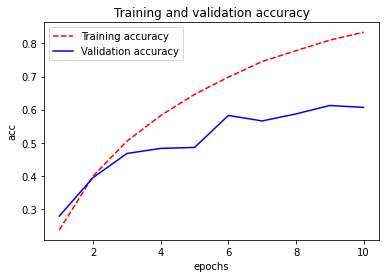

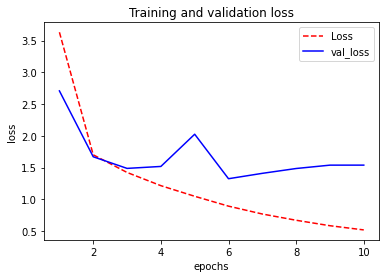

<Figure size 432x288 with 0 Axes>

In [0]:
model = Sequential([Convolution2D(filters=32,#32 filtros
                                  kernel_size = (3, 3), #tamaño filtro
                                  input_shape = (32, 32, 3)),#first conv layer#se debe saber el tamaño de imagen
                                  Activation('relu'),#fn de activacion
                    Convolution2D(filters=32,#la salida anterior entra a otra convolucion
                                  kernel_size = (3, 3)), #tamaño filtro
                                  Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),#reduzco con maxpooling a 2,2
                    Flatten(),#flatten the output tensor
                    Dense(512),#fully conected hidden layer capa densa de 64 neuronas
                    Activation('relu'),
                    Dropout(0.5),#dropout de 0.25
                    Dense(10),# densa de 10 porque tiene 10 posibles valores a clasificar
                    Activation('softmax')])#clasificacion de softmax, entrega prob de pertener a cada modelo
print(model.summary()) # mustra como se construye el modelo

model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')        #no solo capas sino que se optimiza, neuronas conectadas, listas
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)# aquí el entrenamiento del modelo bachsize se entrena de a 100 hasta como con todas# epochs es cantidad de rep que usa el modelo, validacion 10%, verbose muestra avance 

score, acc = model.evaluate(x_test, y_test, verbose=1)#score = model.evaluate(x_test, y_test, verbose=1)# evaluo modelo con conjunto test final
#print('Test accuracy: ', score[1])
print('Test score:', score)
print('Test accuracy:', acc)
print('score', score)
#plt.plot(score)

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecucion fue: ', tiempo_ejecucion)

#PLOTEANDO BBY
history_dict = history.history #paso info a dictionary

print(history_dict)
history_dict.keys()

acc      = history.history['accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)
print(epochs)


plt.plot ( epochs,     acc, 'r--', label='Training accuracy'  )
plt.plot ( epochs, val_acc,  'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' ,label='Loss'  )
plt.plot ( epochs, val_loss ,  'b',label='val_loss'   )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

### Prueba 3 con gpu graficas y revolcon

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_50 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 8, 8, 64)         

<Figure size 432x288 with 0 Axes>

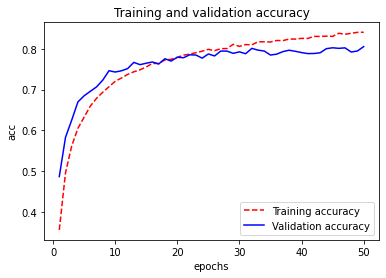

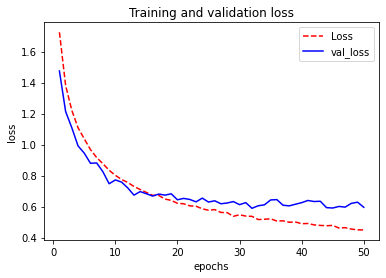

<Figure size 432x288 with 0 Axes>

In [16]:
model = Sequential([Convolution2D(filters=32,#32 filtros
                                  kernel_size = (5, 5), #tamaño filtro
                                  padding = 'same',
                                  input_shape = (32, 32, 3)),#first conv layer#se debe saber el tamaño de imagen
                    Activation('relu'),#fn de activacion
                    MaxPooling2D(pool_size=(2,2)),
                    Convolution2D(filters=64,#la salida anterior entra a otra convolucion
                                  kernel_size = (3, 3), #tamaño filtro
                                  padding = 'same'),
                    Activation('relu'),
                    Dropout(0.35),
                    MaxPooling2D(pool_size=(2,2)),
                    Convolution2D(filters=96,#la salida anterior entra a otra convolucion
                    kernel_size = (3, 3), #tamaño filtro
                    padding = 'same'),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),#reduzco con maxpooling a 2,2
                    Dropout(0.35),
                    Convolution2D(filters=96,#la salida anterior entra a otra convolucion
                    kernel_size = (3, 3), #tamaño filtro
                    padding = 'same'),
                    Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)), 
                    Flatten(),#flatten the output tensor
                    Dense(288),#fully conected hidden layer capa densa de 64 neuronas
                    Activation('relu'),
                    Dropout(0.5),#dropout de 0.5
                    Dense(10),# densa de 10 porque tiene 10 posibles valores a clasificar
                    Activation('softmax')])#clasificacion de softmax, entrega prob de pertener a cada modelo
print(model.summary()) # mustra como se construye el modelo

model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')        #no solo capas sino que se optimiza, neuronas conectadas, listas
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.1, verbose=1)#Bactch size al doble64*2 aquí el entrenamiento del modelo bachsize se entrena de a 100 hasta como con todas# epochs es cantidad de rep que usa el modelo, validacion 10%, verbose muestra avance 

score, acc = model.evaluate(x_test, y_test, verbose=1)#score = model.evaluate(x_test, y_test, verbose=1)# evaluo modelo con conjunto test final
#print('Test accuracy: ', score[1])
print('Test score:', score)
print('Test accuracy:', acc)
print('score', score)
#plt.plot(score)

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecucion fue: ', tiempo_ejecucion)

#PLOTEANDO BBY
history_dict = history.history #paso info a dictionary

print(history_dict)
history_dict.keys()

acc      = history.history['accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)
print(epochs)


plt.plot ( epochs,     acc, 'r--', label='Training accuracy'  )
plt.plot ( epochs, val_acc,  'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' ,label='Loss'  )
plt.plot ( epochs, val_loss ,  'b',label='val_loss'   )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

## sin gpu

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')        #no solo capas sino que se optimiza, neuronas conectadas, listas
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.1, verbose=1)# aquí el entrenamiento del modelo bachsize se entrena de a 100 hasta como con todas# epochs es cantidad de rep que usa el modelo, validacion 10%, verbose muestra avance 
score = model.evaluate(x_test, y_test, verbose=1)# evaluo modelo con conjunto test final
print('Test accuracy: ', score[1])

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecucion fue: ', tiempo_ejecucion)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 85s 2ms/step - loss: 0.4868 - accuracy: 0.9250 - val_loss: 0.0801 - val_accuracy: 0.9792
Epoch 2/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0583 - accuracy: 0.9828 - val_loss: 0.0676 - val_accuracy: 0.9845
Epoch 3/10
54000/54000 [==============================] - 85s 2ms/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0495 - val_accuracy: 0.9890
Epoch 4/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0575 - val_accuracy: 0.9887
Epoch 5/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0651 - val_accuracy: 0.9878
Epoch 6/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0678 - val_accuracy: 0.9888
Epoch 7/10
54000/54000 [==============================] - 85s 2ms/ste

## Ahora con imagenes de otro repositorio #un cambio

In [0]:
from PIL import Image #libreria base de datos de imagenes
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
from google.colab import files #para que permita importar archivos

uploaded = files.upload()

Saving 8.jpg to 8.jpg


In [0]:
import numpy as np
img = Image.open('8.jpg')#cargo imagen a travez del lib pil
new_img = img.resize((28,28))
new_img = new_img.convert('L')#??
new = np.array(new_img)
print(np.shape(new))

(28, 28)


In [0]:
img = new.reshape(1, 28, 28, 1)#(numero de muestras,tamaño, de imagen, canales tiene la imagen RGB grey 4 canales png)
img = img.astype('float32')#para que?
img = img/255.0 #normalizar?
result = model.predict_classes(img)
result[0]

9

In [0]:
from google.colab import drive
drive.mount('/content/drive')